# Proyek Analisis Data: Bike dataset
- Nama: Ali Imron Nasrulloh
- Email: imronnasrulloh009@gmail.com
- Id Dicoding: imron_nasrulloh009

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 
Bagaimana Hubungan Antara Season & Jumlah yang menyewa Sepeda dalam setiap harinya?
- pertanyaan 2
Apakah terdapat pola berdasarkan waktu (bulan, jam) dalam jumlah sewa sepeda setiap harinya?
- pertanyaan 3
Bagaimana trend penggunaan sepeda di hari kerja dan hari libur dalam jumlah sewa sepeda?

## Menyaipkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#membaca bike dataset
df_day = pd.read_csv("day.csv")
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Terdapat 731 baris dan 16 kolom dalam dataset day

In [4]:
df_hour = pd.read_csv("hour.csv")
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#Terdapat 17379 baris dan 17 kolom dalam dataset hour

### Menggabungkan Data 

In [6]:
#Dalam project ini terdapat dua dataframe yaitu (day) dan (hour)

In [7]:
bike_sharing = df_day.merge(df_hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing.shape)
# df_product.head()
bike_sharing.loc[bike_sharing["dteday"].isnull()]
bike_sharing.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#setelah digabungkan menjadi 1 dataframe (bike_sharing) jumlah baris kiri menjadi 17379 dan 32 kolom

### Assessing Data

Sebelum melakukan melakukan analisis data kita terlebih harus melakukan pengecekan data. Apakah data terdapat missing value dan duplicate.

In [9]:
#Memeriksa semua semua DataFrame
print("_____Ini Info df_day_____")
df_day.info()
print("_____Ini Info df_hour_____")
df_hour.info()
print("_____Ini Info bike_sharing_____")
bike_sharing.info()

_____Ini Info df_day_____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
_____Ini Info df_hour_____
<class 'pandas.core.frame.DataFrame'>
Ra

In [10]:
print(bike_sharing.shape)
bike_sharing.isnull().sum()

(17379, 32)


instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Tidak terdapat Missing Value pada semua kolom bike_sharing

In [11]:
print("Jumlah Duplikasi: ", bike_sharing.duplicated().sum())
bike_sharing.describe()

Jumlah Duplikasi:  0


,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

## Exploratory Data Analysis (EDA)

In [12]:
# membuat fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

In [13]:
bike_sharing.describe(include="all")

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Explore ...

In [14]:
#mengelompokkan data berdasarkan musim (season_hourly)
#menghitung beberapa statistik terkait jumlah penyewa pada hari kerja dan statistik angin (windspeed_hourly)

bike_sharing.groupby(by="season_hourly").agg({
    "workingday_hourly": "count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_hourly": ["max", "min", "mean", lambda x: x.max() - x.min()]  # Membuat fungsi custom untuk range
}).sort_values(by=("workingday_hourly", "count"), ascending=False) #mengurutkan hasil berdasarkan (working_day dan count) dengan urutan menurun

workingday_hourly windspeed_hourly                          
                          count              max  min      mean <lambda_0>
season_hourly                                                             
3                          4496           0.8507  0.0  0.171593     0.8507
2                          4409           0.7164  0.0  0.203410     0.7164
1                          4242           0.8060  0.0  0.215107     0.8060
4                          4232           0.6418  0.0  0.170819     0.6418

In [15]:
bike_sharing.groupby(by="season_daily").agg({
    "workingday_daily":"count", #menjumlahkan penyewa pada hari kerja berdasarkan musim
    "windspeed_daily":["max","min","count", lambda x: x.max() - x.min()] #Membuat fungsi custom untuk range
}).sort_values(by=("workingday_daily","count"), ascending=False)

workingday_daily windspeed_daily                           
                        count             max       min count <lambda_0>
season_daily                                                            
3                        4496        0.375617  0.064071  4496   0.311546
2                        4409        0.388067  0.065929  4409   0.322138
1                        4242        0.507463  0.045408  4242   0.462055
4                        4232        0.422275  0.022392  4232   0.399883

In [16]:
bike_sharing.groupby(by="season_daily").mnth_daily .nunique()

season_daily
1    4
2    4
3    4
4    4
Name: mnth_daily, dtype: int64

In [17]:
bike_sharing.groupby(by="season_daily").instant_daily.nunique()

season_daily
1    181
2    184
3    188
4    178
Name: instant_daily, dtype: int64

In [18]:
bike_sharing.groupby(by="season_daily").cnt_daily.nunique()

season_daily
1    179
2    182
3    188
4    176
Name: cnt_daily, dtype: int64

In [19]:
bike_sharing.groupby(by="season_daily").cnt_hourly.nunique()

season_daily
1    482
2    721
3    760
4    690
Name: cnt_hourly, dtype: int64

In [20]:
bike_sharing.groupby(by="weathersit_daily").cnt_hourly.nunique()

weathersit_daily
1    841
2    686
3    187
Name: cnt_hourly, dtype: int64

In [21]:
bike_sharing.groupby(by="weathersit_daily").cnt_daily.nunique()

weathersit_daily
1    451
2    243
3     21
Name: cnt_daily, dtype: int64

### Korelasi

Mencari nilai korelasi data dalam setiap harinya.

In [22]:
numerical_columns = ["holiday_daily" 
 ,"weekday_daily","workingday_daily","weathersit_daily","temp_daily","atemp_daily","season_daily", "windspeed_daily",  "cnt_daily"]
correlation = bike_sharing[numerical_columns].corr()
print(correlation)

                  holiday_daily  weekday_daily  workingday_daily  \
holiday_daily          1.000000      -0.102088         -0.252471   
weekday_daily         -0.102088       1.000000          0.035955   
workingday_daily      -0.252471       0.035955          1.000000   
weathersit_daily      -0.033653       0.035082          0.057122   
temp_daily            -0.028856      -0.001894          0.058460   
atemp_daily           -0.032770      -0.009333          0.057839   
season_daily          -0.009585      -0.002335          0.013743   
windspeed_daily        0.006319       0.018226         -0.018746   
cnt_daily             -0.070344       0.064204          0.068216   

                  weathersit_daily  temp_daily  atemp_daily  season_daily  \
holiday_daily            -0.033653   -0.028856    -0.032770     -0.009585   
weekday_daily             0.035082   -0.001894    -0.009333     -0.002335   
workingday_daily          0.057122    0.058460     0.057839      0.013743   
weathersit_

Hasil di atas ternyata penyewa sepeda memiliki hubungan negatif terhadap hari libur, cuaca dan kecepatan angin

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Hubungan Antara Season & Jumlah yang menyewa Sepeda dalam setiap harinya?

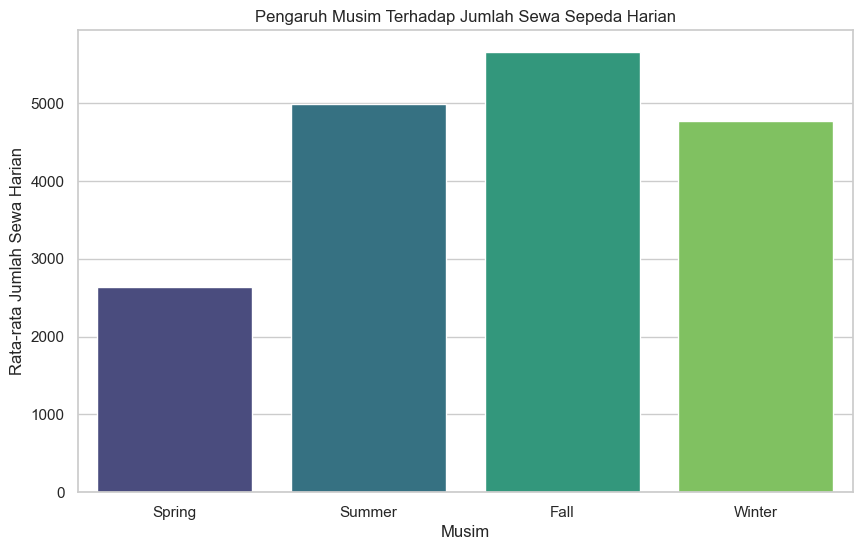

In [50]:
# Menghitung rata-rata jumlah sewa harian berdasarkan musim
seasonal_data = bike_sharing.groupby('season_daily')['cnt_daily'].mean().reset_index()

# Memberi nama musim
seasonal_data['season_name'] = ['Spring', 'Summer', 'Fall', 'Winter']

# Visualisasi menggunakan barplot seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt_daily', data=seasonal_data, palette="viridis")

# Menambahkan judul dan label 
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')

plt.show()

Dari visualisasi di atas dapat kita lihat bahwa, jumlah yang sewa sepeda lebih banyak di musim gugur atau (fall) Kemudian Musim Panas (Summer) Poisis ketiga (Winter) Musim Dingin

In [51]:
import warnings
warnings.filterwarnings("ignore")

#agar tidak ada warning

### Pertanyaan 2 Apakah terdapat pola berdasarkan waktu (bulan, jam) dalam jumlah sewa sepeda setiap harinya?

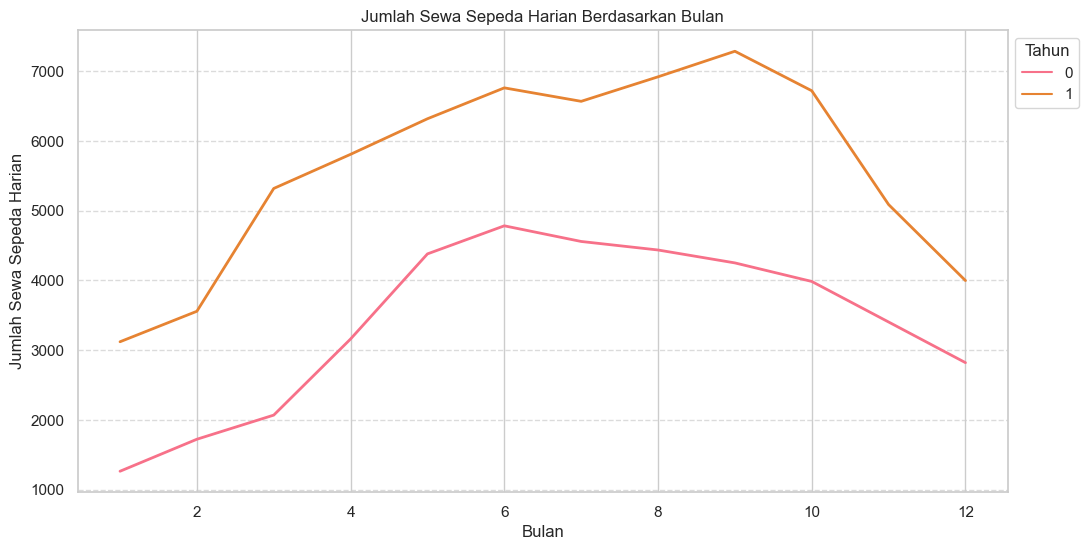

In [47]:
# Mencari Pola berdasarkan bulan

# Mengatur warna palet
color_palette = sns.color_palette("husl", 12)  # Menggunakan palet warna "husl" dengan 12 warna

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(x="mnth_daily", y="cnt_daily", data=bike_sharing, ci=None, hue="yr_daily", palette=color_palette, linewidth=2)

# legend
plt.legend(title="Tahun", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Jumlah Sewa Sepeda Harian Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

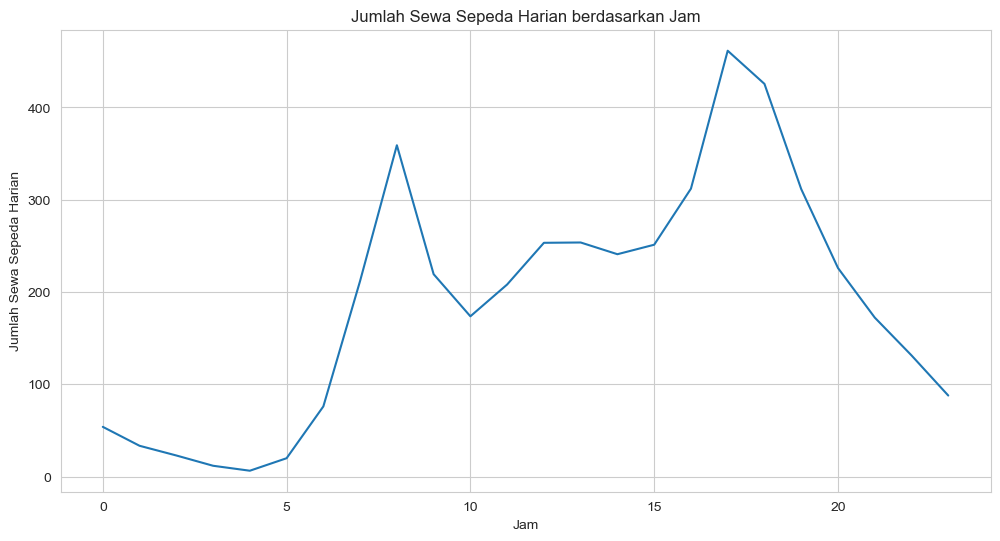

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing, ci=None)
plt.title("Jumlah Sewa Sepeda Harian berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Dari grafik di atas kita dapat menyimpulkan bahwa sewa sepeda lebih banyak pada bulan 6 dan bulan 9 
Berdasarkan Jam jumlah sewa sepeda banyak terjadi antara jam 8 pagi dan jam 17 hingga jam 18 

### Pertanyaan 3 Bagaimana trend penggunaan sepeda di hari kerja dan hari libur dalam jumlah sewa sepeda?

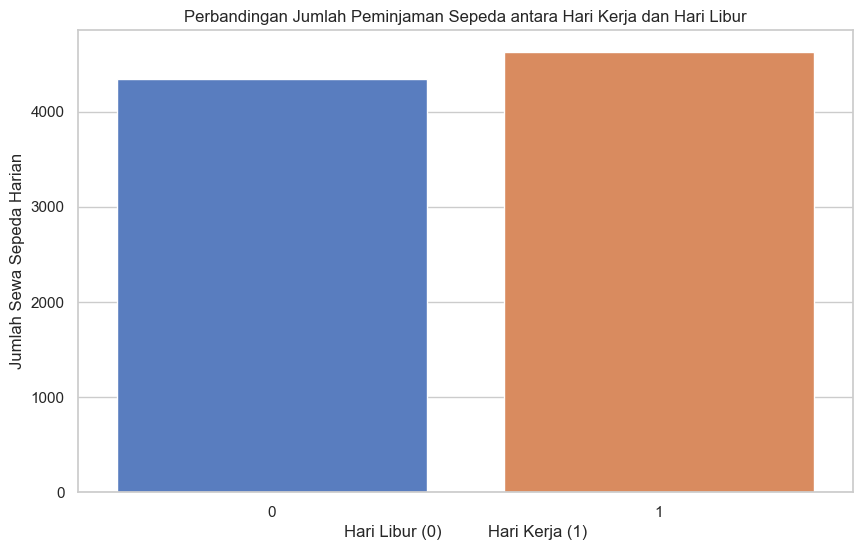

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x="workingday_daily", y="cnt_daily", data=bike_sharing, ci=None, palette="muted")

plt.xlabel("Hari Libur (0)          Hari Kerja (1)")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.title("Perbandingan Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur")

plt.show()

## Conclusion

#### Pertanyaan 1: Bagaimana Hubungan Antara Season & Jumlah yang menyewa Sepeda dalam setiap harinya?
Dari visualisasi yang telah disajikan, dapat ditarik beberapa kesimpulan untuk keputusan bisnis:

1. Musim Gugur (Fall) Menjadi Pilihan Favorit:
- Jumlah sewa sepeda tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer).
- Keputusan bisnis dapat mencakup peningkatan persediaan sepeda dan pelayanan terkait selama musim gugur, karena permintaan konsumen cenderung tinggi pada periode ini.

2. Musim Semi (Spring) Memiliki Permintaan yang Lebih Rendah:
- Musim Semi (Spring) menunjukkan jumlah sewa yang lebih rendah dibandingkan musim lainnya.
- Bisnis dapat mempertimbangkan strategi khusus, seperti promosi musiman atau diskon, untuk meningkatkan minat sewa sepeda selama musim dingin.

3. Strategi Pemasaran Terfokus pada Musim Gugur dan Musim Panas:
- Mengingat tingginya permintaan selama musim gugur dan musim panas, bisnis dapat mengalokasikan sumber daya pemasaran dan promosi lebih intensif pada periode ini.
- Penawaran spesial, paket bundel, atau acara-acara khusus dapat menarik lebih banyak pelanggan selama musim puncak.

4. Penyesuaian Persediaan Berdasarkan Musim:
- Analisis musiman dapat digunakan untuk mengoptimalkan stok sepeda dan peralatan terkait. Peningkatan persediaan selama musim tinggi dan pengelolaan yang efisien selama musim rendah dapat membantu mengoptimalkan biaya persediaan.

5. Pengembangan Layanan atau Acara Khusus:
- Menyelenggarakan acara atau layanan khusus yang berkaitan dengan musim tertentu dapat meningkatkan daya tarik dan minat pelanggan. Misalnya, tur musim gugur atau penyewaan sepeda salju selama musim dingin.
Dengan memahami pola musiman dalam jumlah sewa sepeda, bisnis dapat mengambil keputusan strategis untuk meningkatkan pengalaman pelanggan, mengoptimalkan operasional, dan meningkatkan kinerja keuangan secara keseluruhan.

#### Pertanyaan 2 Apakah terdapat pola berdasarkan waktu (bulan, jam) dalam jumlah sewa sepeda setiap harinya?

Dari grafik di atas kita dapat menyimpulkan bahwa sewa sepeda lebih banyak pada bulan 6 dan bulan 9 
Berdasarkan Jam jumlah sewa sepeda banyak terjadi antara jam 8 pagi dan jam 17 hingga jam 18 

Berdasarkan kesimpulan dari grafik jumlah sewa sepeda pada bulan dan jam tertentu, kita dapat merumuskan beberapa keputusan bisnis yang dapat meningkatkan kinerja dan pengalaman pelanggan:

1. Penyesuaian Persediaan dan Pelayanan:
- Pada bulan Juni dan September, yang merupakan puncak jumlah sewa sepeda, bisnis sepeda dapat menyesuaikan persediaan sepeda dan peralatan terkait untuk memenuhi permintaan yang lebih tinggi.
- Pelayanan pelanggan seperti penyediaan panduan wisata atau tur khusus selama bulan-bulan ini dapat meningkatkan pengalaman pelanggan.

2. Promosi dan Pemasaran Khusus:
- Mengingat puncak permintaan pada bulan Juni dan September, bisnis dapat merancang promosi musiman, diskon, atau paket khusus untuk meningkatkan minat dan meningkatkan volume sewa.
- Kampanye pemasaran yang terfokus pada keindahan dan cuaca yang baik selama bulan-bulan ini dapat menarik perhatian pelanggan potensial.

3. Penyesuaian Jam Operasional:
- Memperpanjang jam operasional selama periode antara pukul 8 pagi hingga 6 sore dapat membantu bisnis menangkap puncak aktivitas penyewaan sepeda.
- Jika memungkinkan, menyesuaikan jam operasional dengan preferensi pelanggan dan kebutuhan pasar dapat meningkatkan keterjangkauan dan kepuasan pelanggan.

4. Pengembangan Layanan Selama Jam Puncak:
- Menyediakan layanan tambahan seperti penyewaan aksesoris, makanan ringan, atau paket wisata selama jam puncak dapat meningkatkan pendapatan per pelanggan.

5. Optimalkan Rute Wisata atau Jalur Sepeda:
- Bisnis dapat menyusun rute wisata atau jalur sepeda yang menarik selama bulan-bulan puncak untuk meningkatkan daya tarik destinasi dan pengalaman pelanggan.

6. Investasi dalam Infrastruktur:
- Jika jam sewa sepeda pada jam 8 pagi hingga 6 sore menjadi puncak, bisnis dapat berinvestasi dalam infrastruktur tambahan seperti stasiun penyewaan yang mudah diakses atau peningkatan fasilitas parkir sepeda.

Keputusan bisnis ini dapat membantu bisnis sepeda untuk mengoptimalkan kinerja mereka, merespons perubahan permintaan pasar, dan memberikan pengalaman yang lebih baik kepada pelanggan. Selalu penting untuk terus memantau tren pasar dan mendengarkan umpan balik pelanggan untuk menyesuaikan strategi secara dinamis.

#### Pertanyaan 3 Bagaimana trend penggunaan sepeda di hari kerja dan hari libur dalam jumlah sewa sepeda?


Berdasarkan hasil analisis, dapat disimpulkan bahwa bisnis sewa sepeda cenderung mengalami permintaan yang lebih tinggi pada hari kerja dibandingkan dengan hari libur.

Faktor-faktor tertentu mungkin memengaruhi pola ini, seperti kebutuhan transportasi harian untuk pekerja atau pelajar.

Oleh karena itu, untuk meningkatkan kinerja bisnis, strategi pemasaran dan operasional dapat diarahkan untuk mengoptimalkan penawaran pada hari kerja, seperti menyesuaikan harga, meningkatkan ketersediaan sepeda, atau menyelenggarakan promosi khusus pada hari-hari tersebut. Selain itu, pemilik bisnis juga dapat melakukan survei pelanggan atau analisis lebih lanjut untuk memahami lebih baik faktor-faktor yang mempengaruhi pola sewa sepeda dan mengadaptasi strategi mereka sesuai dengan preferensi dan kebutuhan pelanggan.